# 데이터 클리닝

### 결측치 확인

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/attendance.csv', index_col=0)

In [3]:
df

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,NaN,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,NaN,4537,1150
2013,11373,7656,NaN,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [4]:
df.isnull()

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,False,False,False,False,False
2009,False,False,False,False,False
2010,False,False,True,False,False
2011,False,False,False,False,False
2012,False,False,True,False,False
2013,False,False,True,False,False
2014,False,False,False,False,False
2015,False,False,False,False,False
2016,False,False,False,False,False


In [5]:
df.isnull().sum()

야구      0
축구      0
배구      3
남자농구    0
여자농구    0
dtype: int64

### 결측치 처리

### 옵션 1. 그대로 두기

### 옵션 2. 결측치 삭제

In [6]:
df.dropna() # 결측치가 있는 row를 통채로 삭제

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2011,13055,10709,1774.0,3955,1445
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425
2017,11668,6502,2425.0,3188,1097


In [7]:
df # 기존 df에 영향을 주지 않음

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,NaN,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,NaN,4537,1150
2013,11373,7656,NaN,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [8]:
df.dropna(inplace=True)
df

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2011,13055,10709,1774.0,3955,1445
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425
2017,11668,6502,2425.0,3188,1097


In [9]:
# 원상복구
df = pd.read_csv('data/attendance.csv', index_col=0)

### 특정 column만 삭제하여 결측치 제거(배구만 결측치가 있음)

In [10]:
df.dropna(axis='columns') # 결측치가 있는 배구 컬럼 삭제

,야구,축구,남자농구,여자농구
연도,,,,
2008,10881,11642,4208,1329
2009,11562,10983,4152,1206
2010,11402,12873,3870,705
2011,13055,10709,3955,1445
2012,13747,7157,4537,1150
2013,11373,7656,4092,1237
2014,11429,8115,4458,1417
2015,10357,7720,3953,1480
2016,11583,7854,3543,1425


### 옵션 3. 결측값을 뭔가로 대체하는 방법

In [11]:
df.fillna(0) # 결측값을 0으로 대체

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,0.0,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,0.0,4537,1150
2013,11373,7656,0.0,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


## 어떤 값으로 대체하는 것이 좋을까? 보통 평균값 또는 중간값으로 대체

In [12]:
df.mean()

야구      11705.700000
축구       9121.100000
배구       1933.857143
남자농구     3995.600000
여자농구     1249.100000
dtype: float64

In [13]:
df.fillna(df.mean()) # 결측값이 평균값으로 대체

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.000000,4208,1329
2009,11562,10983,1471.000000,4152,1206
2010,11402,12873,1933.857143,3870,705
2011,13055,10709,1774.000000,3955,1445
2012,13747,7157,1933.857143,4537,1150
2013,11373,7656,1933.857143,4092,1237
2014,11429,8115,1967.000000,4458,1417
2015,10357,7720,2311.000000,3953,1480
2016,11583,7854,2336.000000,3543,1425


In [14]:
df.median()

야구      11495.5
축구       7984.5
배구       1967.0
남자농구     4023.5
여자농구     1283.0
dtype: float64

In [15]:
df.fillna(df.median()) # 결측값이 중간값으로 대체

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,1967.0,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,1967.0,4537,1150
2013,11373,7656,1967.0,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [16]:
df

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,NaN,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,NaN,4537,1150
2013,11373,7656,NaN,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [17]:
df.fillna(df.median(), inplace=True)

In [18]:
df

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,1967.0,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,1967.0,4537,1150
2013,11373,7656,1967.0,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


## 데이터의 유일성 유지

### 중복값을 찾아서 제거

In [19]:
df = pd.read_csv('data/dust.csv', index_col = 0)
df.head()

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18


In [20]:
df.index # 날짜 뽑기

Index(['08월 11일', '08월 10일', '08월 09일', '08월 08일', '08월 07일', '08월 06일',
       '08월 05일', '08월 04일', '08월 03일', '08월 02일', '08월 01일', '07월 31일',
       '07월 31일', '07월 30일', '07월 29일', '07월 28일', '07월 27일', '07월 26일',
       '07월 25일', '07월 24일', '07월 23일', '07월 22일', '07월 21일', '07월 20일',
       '07월 19일', '07월 18일', '07월 17일', '07월 16일', '07월 15일', '07월 14일',
       '07월 13일'],
      dtype='object', name='날짜')

In [21]:
df.index.value_counts()

07월 31일    2
08월 10일    1
07월 19일    1
07월 18일    1
07월 30일    1
07월 27일    1
07월 23일    1
07월 25일    1
07월 16일    1
07월 13일    1
07월 29일    1
08월 08일    1
07월 17일    1
08월 01일    1
08월 11일    1
08월 02일    1
07월 26일    1
08월 04일    1
08월 06일    1
08월 03일    1
08월 09일    1
07월 28일    1
07월 21일    1
07월 22일    1
08월 05일    1
07월 20일    1
07월 15일    1
07월 14일    1
08월 07일    1
07월 24일    1
Name: 날짜, dtype: int64

In [22]:
df.loc['07월 31일']

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19


In [23]:
df.drop_duplicates() # 중복된 row 삭제

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24,22
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22,25
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27,39
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26,33


In [24]:
df # 기존 df 변화 없음

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24,22
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22,25
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27,39
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26,33


In [25]:
df.drop_duplicates(inplace = True) # 중복된 row 삭제

In [26]:
df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24,22
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22,25
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27,39
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26,33


In [29]:
df.T.drop_duplicates() # 이름은 다르지만 내용이 같으므로 삭제

날짜,08월 11일,08월 10일,08월 09일,08월 08일,08월 07일,08월 06일,08월 05일,08월 04일,08월 03일,08월 02일,...,07월 22일,07월 21일,07월 20일,07월 19일,07월 18일,07월 17일,07월 16일,07월 15일,07월 14일,07월 13일
서울,7,15,24,26,20,31,27,27,44,40,...,30,37,36,30,35,30,26,22,20,21
부산,17,25,26,25,26,39,36,36,32,26,...,28,37,70,76,55,56,48,49,46,43
대구,15,15,26,28,22,29,25,26,23,20,...,20,41,56,54,42,49,42,21,26,29
인천,10,20,27,26,25,35,31,31,47,41,...,30,30,27,29,36,32,24,22,22,19
광주,29,28,27,29,33,27,27,27,29,26,...,21,48,46,36,39,38,37,23,24,23
대전,12,25,27,31,24,31,24,27,28,19,...,40,57,44,40,42,36,30,18,17,19
울산,12,17,22,20,18,31,30,32,29,20,...,26,42,77,81,66,65,59,55,54,47
경기,9,20,27,26,23,30,27,31,44,39,...,34,38,36,32,36,32,28,23,21,21
강원,16,16,25,29,18,22,25,39,33,25,...,44,51,44,40,39,44,36,25,26,24
충북,14,25,32,33,23,33,31,36,31,24,...,48,59,51,47,47,43,38,24,23,24


In [30]:
df.T.drop_duplicates().T # 이름은 다르지만 내용이 같으므로 삭제

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주
날짜,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26


### inplace=True 를 사용할 수 없음

In [31]:
df = df.T.drop_duplicates().T

In [32]:
df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주
날짜,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26


## 이상점(Outlier)

### 이상점을 판단하는 기준

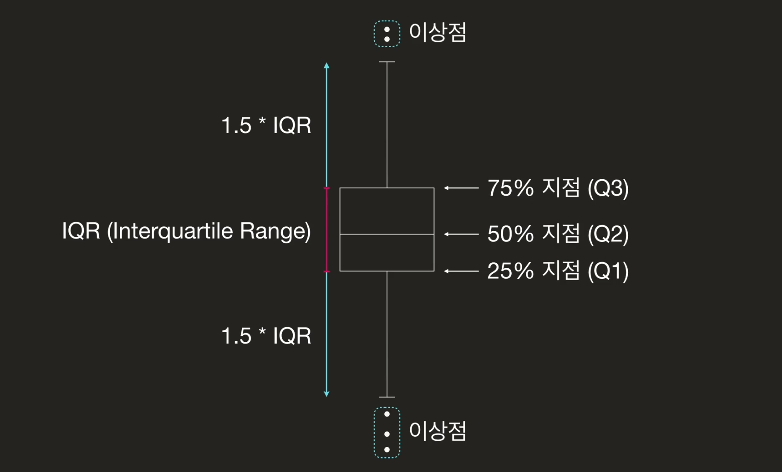

## 이상점은 어떻게 처리해야하는가?
- 분석에 방해가 되면 제거
- 의미 있는 정보라면 그냥 둔다

## 데이터 정확성

In [33]:
df = pd.read_csv('data/beer.csv', index_col=0)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0


<AxesSubplot:>

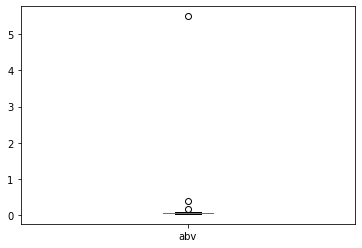

In [34]:
df.plot(kind='box', y = 'abv')

In [35]:
df['abv'].describe()

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [37]:
df['abv'].quantile(0.25) # 25% 지점

0.05

In [39]:
df['abv'].quantile(0.75) # 75% 지점

0.065

In [40]:
q1 = df['abv'].quantile(0.25)
q3 = df['abv'].quantile(0.75)
iqr = q3 - q1

In [42]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)

In [43]:
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [44]:
df.loc[2250, 'abv'] = 0.055

In [45]:
df.loc[2250]

abv                             0.055
ibu                              40.0
id                                145
name              Silverback Pale Ale
style         American Pale Ale (APA)
brewery_id                        424
ounces                           12.0
Name: 2250, dtype: object

In [46]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [47]:
df[condition].index

Int64Index([963, 1856], dtype='int64')

In [48]:
df.drop(df[condition].index, inplace=True)

In [49]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces


<AxesSubplot:>

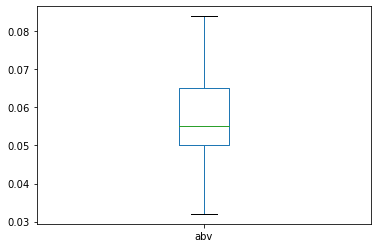

In [50]:
df.plot(kind='box', y = 'abv')

## 관계적 이상점(Relational Outlier)
### 두 변수의 관계를 고려했을 때 이상한 데이터
### 예시 ) 키 188cm 몸무게 42kg

In [51]:
df = pd.read_csv('data/exam_outlier.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:xlabel='reading score', ylabel='writing score'>

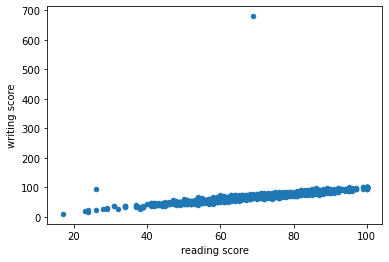

In [52]:
df.plot(kind='scatter', x='reading score', y='writing score')

In [54]:
df.corr() # 이상점이 영향을 줬을 것으로 판단

,math score,reading score,writing score
math score,1.000000,0.810412,0.513623
reading score,0.810412,1.000000,0.582378
writing score,0.513623,0.582378,1.000000


In [55]:
df['writing score'] > 100

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: writing score, Length: 1000, dtype: bool

In [56]:
df[df['writing score'] > 100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
51,male,group E,associate's degree,free/reduced,completed,77,69,680


In [57]:
df.drop(51, inplace=True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:xlabel='reading score', ylabel='writing score'>

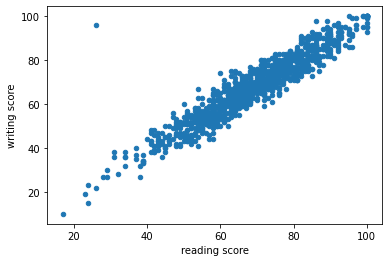

In [58]:
df.plot(kind='scatter', x='reading score', y='writing score')

In [59]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.810627,0.802853
reading score,0.810627,1.000000,0.943248
writing score,0.802853,0.943248,1.000000


In [63]:
condition = (df['writing score'] > 90) & (df['reading score'] < 40)

In [64]:
df[condition]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
373,female,group D,some college,standard,completed,82,26,96


In [65]:
df.drop(373, inplace=True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:xlabel='reading score', ylabel='writing score'>

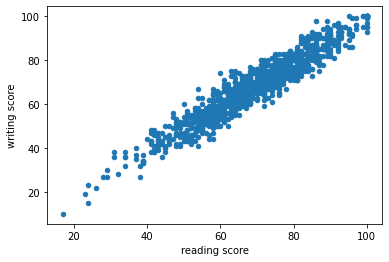

In [66]:
df.plot(kind='scatter', x='reading score', y='writing score')

In [67]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817735,0.802722
reading score,0.817735,1.000000,0.954440
writing score,0.802722,0.954440,1.000000
